#안녕하세요.
2024.01.25 시작하도록 하겠습니다.


어제는 그래프를 만드는 것에 집중했다면 오늘은 주파수 해석을 위한 다양한 도구를 말씀 드리도록 하겠습니다.

먼저 간단한 실습을 위한 기초 데이터를 생성하도록 하겠습니다.

#주파수에 대한 문제 해석

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

저는 데이터 셋으로 하지 않고 Sin 데이터를 만들어서 수행하겠습니다.

여러분은 어제 생성된 데이터셋을 이용하시면 좋을 것 같아요.


이 아래 부분에 데이터 셋 까지는 연동하시면 좋겠습니다.

In [ ]:
def sin_wave(amp, freq, time): #Sin 함수 만들기
    return amp * np.sin(2*np.pi*freq*time)

In [ ]:
time = np.arange(0, 10, 0.001) #0~10초간 0.001 단위로 쪼개서 Time array 만들기
                               #np.arange(0, 10, 0.001) 의 경우 start=0, stop=10, step=0.001
sin1 = sin_wave(1, 10, time) #Sin wave 함수를 호출하여 1 amp / 10 freq / time 만큼 생성
sin2 = sin_wave(2, 5, time)  #위와 동일 Sin wave 함수를 호출 ? amp / ?? freq / time 만큼 생성 ? 맞춰보세요
sin3 = sin_wave(4, 1, time)  #위와 동일 Sin wave 함수를 호출 ? amp / ?? freq / time 만큼 생성 ? 맞춰보세요

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

위 결과를 확인하게 되면 주파수가 서로다른 함수 3개를 확인할 수 있습니다.

주파수란 무엇일까요? 주파수는 기계진동역학에서 에너지로 인한 떨림 현상을 표현합니다. 이 주파수는 분해될 수 있고 합성될 수 있습니다.
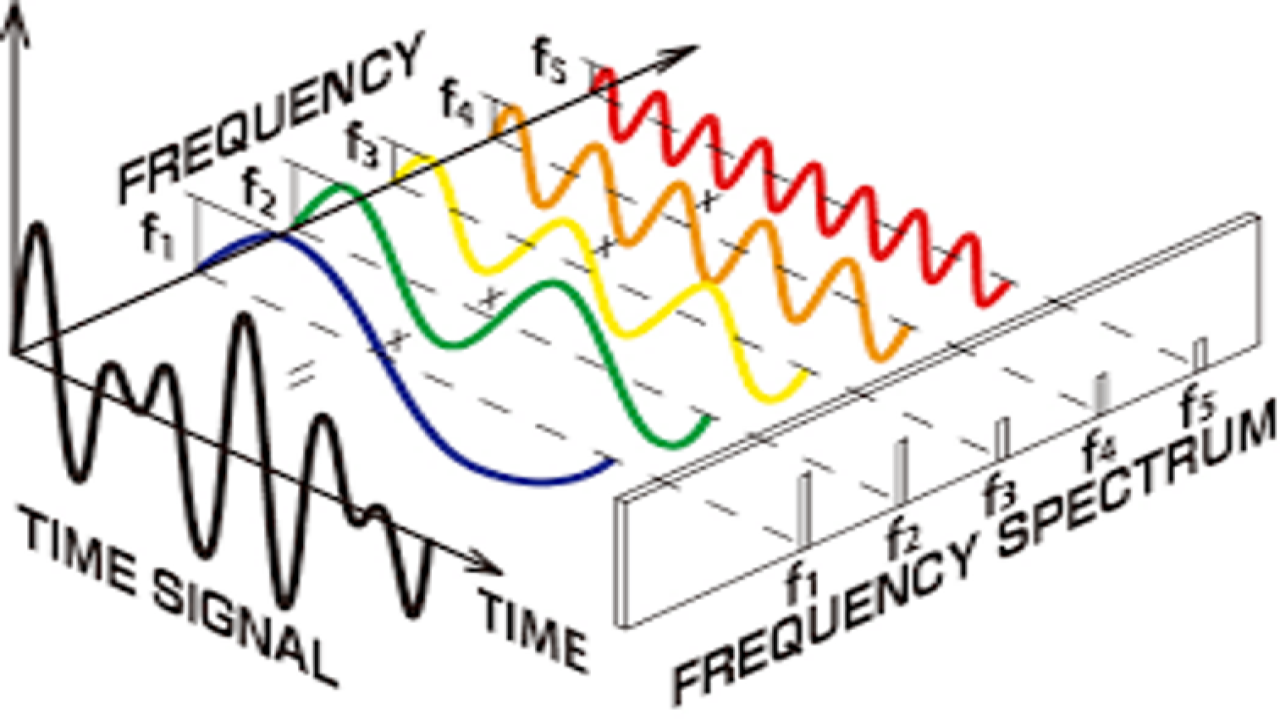

f1, f2, f3, f4, f5의 주파수가 합성되면 Time Signal 처럼 이상하게 꼬인 그래프가 보일테지만 사실은 알고보면 주파수 5개가 합쳐진 것입니다.

우리는 주파수 분석을 통해 기계회전, 혹은 에너지 전달의 주기성을 보고
문제를 발견하는 것이지요.

위에서 만든 Sin 3개의 그래프를 합성해보겠습니다. 매우 쉬워요! 합치면 됩니다!

In [ ]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

In [ ]:
n = len(sin_sum) #전체 데이터의 길이
k = np.arange(n) #0,1,2,3,4,~~~~9999 의 배열 생성 10000개 -> 왜 10000만개 일까요?
                 # 앞서 10까지 데이터를 구축하는데 0.001 단위로 Step 이니 총 데이터의 개수는 10000개 이겠죠?
Fs = 1/0.001 #샘플링 주파수를 계산하는 것입니다. Step의 역수 = 1000Hz
T = n/Fs #데이터의 길이를 샘플링 주파수로 나누면 전체 시간(T)을 계산할 수 있겠죠? 여기서는 10 입니다.
freq = k/T #Freq 는 전체 데이터의 배열을 시간으로 나눈 값 =  1000HZ
half_freq = freq[range(int(n/2))] #주파수 를 절반으로 나눈 값

Half 주파수 는 왜 필요한 걸까요?
우리가 측정 가능한 반복이라는 것은 데이터 안에서 2번은 최소한 반복되어야 합니다.

따라서 2번 반복되지 않은 성분은 그냥 버리면 됩니다.

그리하여 Double side FFT / Single side FFT 가 가능하게 되고 일반적으로는 Single side FFT 만 측정하여도 우리가 해석 가능한 주파수가 존재하게 됩니다.

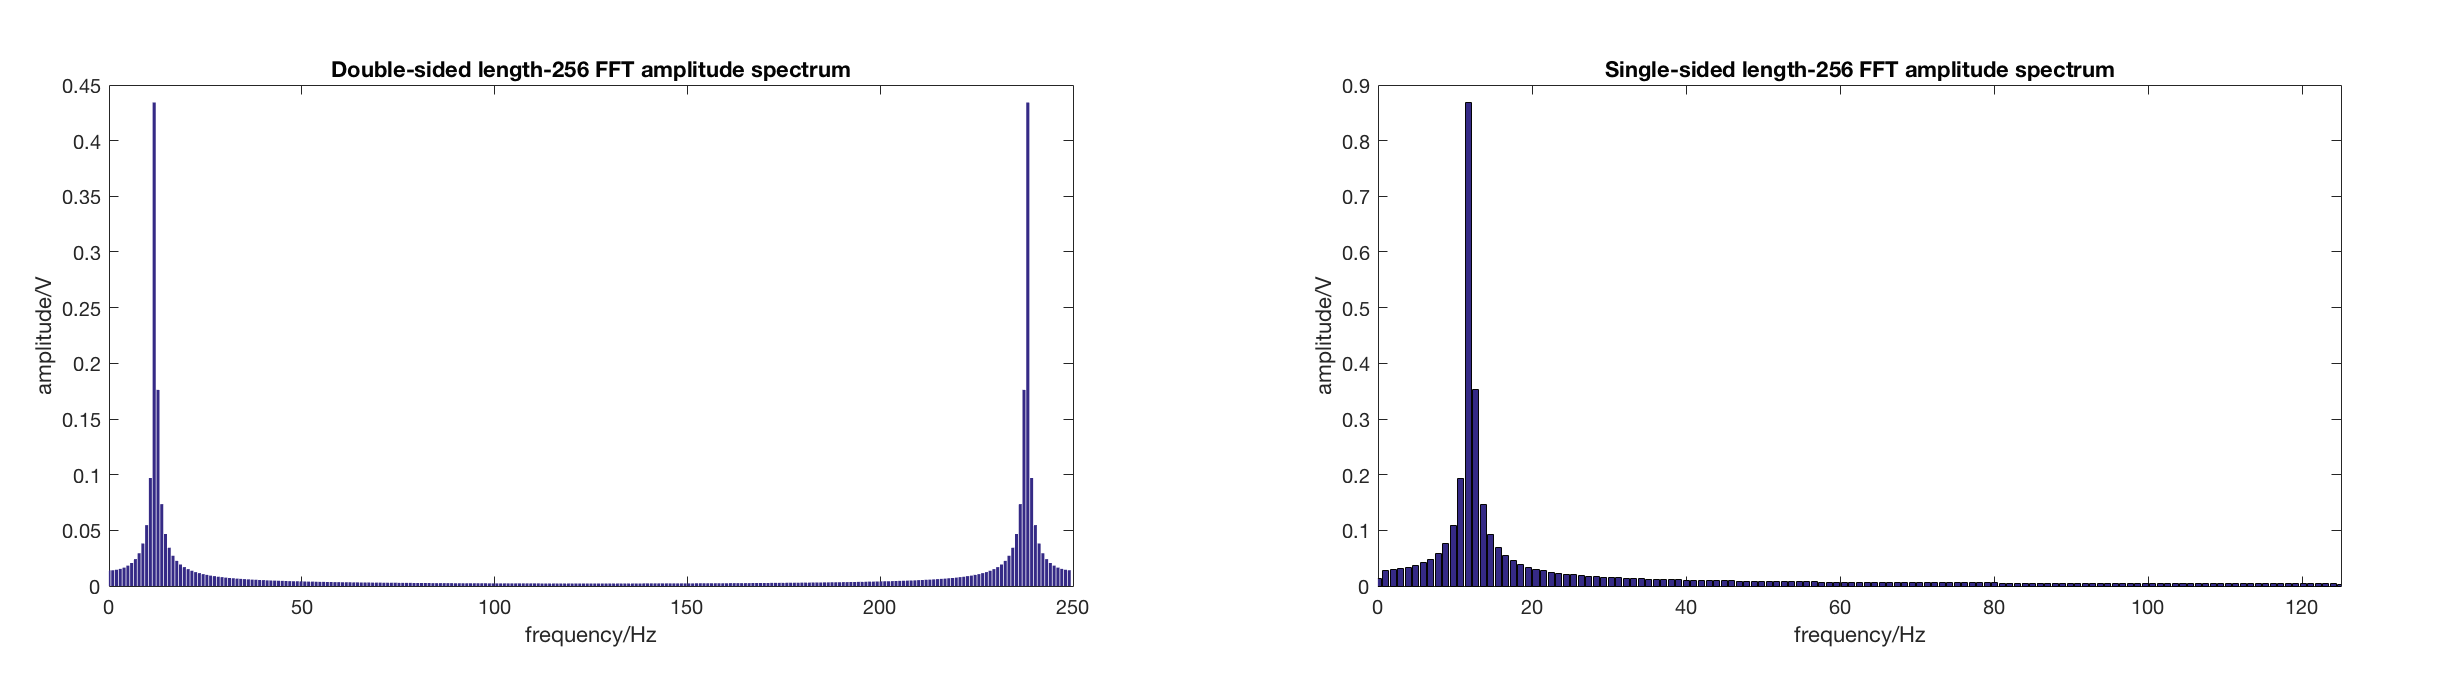

In [ ]:
fft_values = np.fft.fft(sin_sum)  # FFT 수행
single_side_fft = np.abs(fft_values[:n // 2]) / n  # 양측 주파수 스펙트럼 계산

# 주파수 스펙트럼 그리기

plt.plot(freq[:n // 2], single_side_fft)
plt.title('Single Side FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
fft_values = np.fft.fft(sin_sum)  # FFT 수행
double_side_fft = np.abs(fft_values) /n  # 양측 주파수 스펙트럼 계산

# 주파수 스펙트럼 그리기

plt.plot(freq, double_side_fft)
plt.title('Double Side FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(half_freq, abs(single_side_fft), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(half_freq, [0], abs(single_side_fft))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

위와 같이 전체적인 시그널의 분석이 완료 되었습니다.
1HZ 영역에서 2 AMP의 시그널
5HZ의 영역에서 1 AMP 의 시그널
10HZ의 영역에서 0.5 AMP의 시그널 이 반복되었다고 합니다.


앞서 만든 함수와 비교해 보겠습니다.

1) sin1 = sin_wave(1, 10, time) -> 절반인 0.5 (위아래 합치면 1)

2) sin2 = sin_wave(2, 5, time) -> 절반인 1 (위아래 합치면 2)

3) sin3 = sin_wave(4, 1, time) -> 절반인 2 (위아래 합치면 4)

위와 같은 데이터 분석을 통해 우리는 Preventive Maintenance 를 수행할 수 있습니다.

특정 주파수 영역이 얼마 이상을 넘으면 이를 Safty zone 을 넘었다고 평가하는 것입니다.

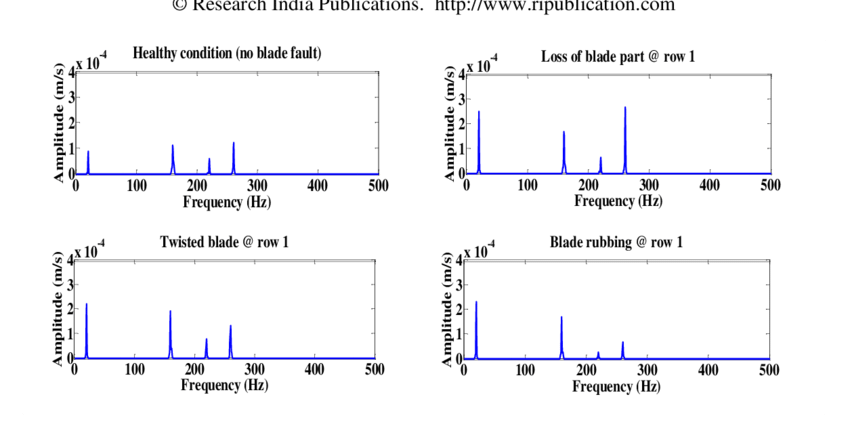

위와 같이 특정 조건에서는 특정 Freq 가 증가하는 모습을 보일 수 있습니다.

---

**퀴즈** - 여기서 위의 측정 가능한 Hz는 500 입니다 -> 그렇다면 sampling Hz 는 얼마일까요?

---



# 시간에 대한 문제 해석

이제까지 주파수에 대한 분석만을 수행했습니다. 그럼 시간은 별로 중요하지 않은 것일까요? 일반적으로 인식은 그렇지 않습니다만 다음의 예를 한번 보시죠!

In [ ]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))

모든 데이터를 이어 붙여서 1000 의 데이터 4개를 합성하였습니다. 총 4000 개의 데이터가 붙여진 것이죠

In [ ]:
time = np.arange(0, 40, 0.001)# 40000 개
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

위의 그래프로 FFT를 그려보도록 하겠습니다

In [ ]:
n = len(sin_concat)
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T

In [ ]:
fft_values = np.fft.fft(sin_concat)  # FFT 수행
single_side_fft = np.abs(fft_values[:n // 2]) /n  # 양측 주파수 스펙트럼 계산

# 주파수 스펙트럼 그리기
plt.plot(freq[:n // 2], single_side_fft)
plt.title('Single Side FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
time = np.arange(0, 10, 0.001)# 10000 개
plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

time = np.arange(0, 40, 0.001)# 40000 개
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

서로 이렇게 다른 그래프 인데도 불구하고 FFT 분석을 통해서는 차이를 보이고 있지 않습니다. 이렇게 된 문제를 해결하는 것이

STFT (Short Time Fourier Transform - STFT) 입니다

이건 내일 다시하도록 하겠습니다!

#적용 - 해결하세용!

그럼 어제 배운 코드입니다.
이제 단순 퓨리에 변환을 한다고 다시 말해도 이제는 시그널 샘플링 / 주파수를 확인하시는 과정을 거쳐야 합니다.


즉 기존에 데이터가 어떻게 수집되었는지를 이해해야 해당 과정을 잘 수행할 수 있습니다.

위의 설명을 다시 읽어보시고
어제 만드셨던 FFT가 정상인지 평가하신후 토론 해주시길 바랍니다.

In [ ]:
import numpy as np

fft = np.fft.fft(data['signal'][:5000])

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft)

# 초당 샘플 개수
fs = len(data)
nfft = 50
sr = fs/nfft

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은
#대칭구조로 나와서 high frequency 부분 절반을 날려고
#앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(20,5))
plt.title("Power spectrum")
plt.plot(left_f, left_spectrum)
plt.ylabel("Magnitude")